<a href="https://colab.research.google.com/github/farhanasajeer/correlation-regression/blob/main/trafficCORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv('/content/drive/MyDrive/traffic.csv.zip')

In [23]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [24]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [25]:
data.drop('DateTime',axis=1,inplace=True)

In [26]:
data=pd.get_dummies(data)
data.head()

,Junction,Vehicles,ID
0,1,15,20151101001
1,1,13,20151101011
2,1,10,20151101021
3,1,7,20151101031
4,1,9,20151101041


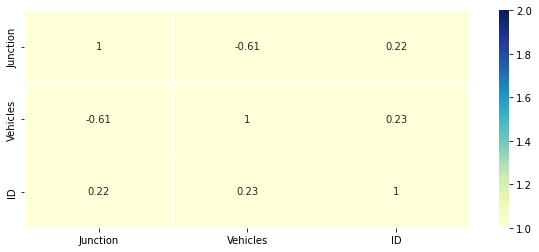

In [27]:
# find the correlation using corr function

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [28]:
x=data.drop('ID',axis=1)
y=data['ID']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [30]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [31]:
predictions=model.predict(x_test)

In [32]:
print(y_test)

24632    20161223082
36428    20160828203
42150    20170424063
23885    20161122052
2174     20160130141
            ...     
47783    20170616234
39675    20170111033
844      20151206041
33689    20160506173
40985    20170306173
Name: ID, Length: 12030, dtype: int64


In [33]:
print(predictions)

[2.01603463e+10 2.01785514e+10 2.01645733e+10 ... 2.01569512e+10
 2.01647397e+10 2.01657382e+10]


In [34]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 26241218151664.023
